# Data Mining Lab 2
In this lab session we will focus on the use of Neural Word Embeddings and exploring some basic open source LLMs' applications to data.

## Table of Contents
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization
10. Large Language Models (LLMs)


### Necessary Library Requirements:

#### Same as Lab1 except PAMI:
- [Jupyter](http://jupyter.org/) (Strongly recommended but not required)
    - Install via `pip3 install jupyter` and use `jupyter notebook` in terminal to run
- [Scikit Learn](http://scikit-learn.org/stable/index.html)
    - Install via `pip3 install scikit-learn` from a terminal
- [Pandas](http://pandas.pydata.org/)
    - Install via `pip3 install pandas` from a terminal
- [Numpy](http://www.numpy.org/)
    - Install via `pip3 install numpy` from a terminal
- [Matplotlib](https://matplotlib.org/)
    - Install via `pip3 install maplotlib` from a terminal
- [Plotly](https://plot.ly/)
    - Install via `pip3 install plotly` from a terminal
- [Seaborn](https://seaborn.pydata.org/)
    - Install via `pip3 install seaborn`
- [NLTK](http://www.nltk.org/)
    - Install via `pip3 install nltk` from a terminal
- [UMAP](https://umap-learn.readthedocs.io/en/latest/)
    - Install via `pip3 install umap-learn` from a terminal
    

#### New Libraries to install:
- [Gensim](https://pypi.org/project/gensim/)
    - Install via `pip3 install gensim`

- [tensorflow](https://www.tensorflow.org/)
    - Install via `pip3 install tensorflow`
    - Also install `pip3 install tensorflow-hub`

- [Keras](https://keras.io/)
    - Install via `pip3 install keras`

- [Ollama](https://ollama.com)
    - Install via `pip3 install ollama`

- [langchain](https://www.langchain.com)
    - Install via `pip3 install langchain`
    - Also install `pip3 install langchain_community`
    - Also install `pip3 install langchain_core`
    
- [beautifulsoup4](https://pypi.org/project/beautifulsoup4/)
    - Install via `pip3 install beautifulsoup4`
    
- [chromadb](https://www.trychroma.com)
    - Install via `pip3 install chromadb`
    
- [gradio](https://www.gradio.app)
    - Install via `pip3 install gradio`
    
#### Open-source LLMs to install:
- ollama run llama3.2
- ollama run llama3.2:1b  (optional if the first one is too big)
- ollama run llava-phi3

---
## Introduction

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

![pic0.png](https://github.com/davidshiao55/DM2024-Lab2-Master/blob/main/pics/pic0.png?raw=1)

---
## 1. Data Preparation

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

## 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [1]:
!git clone https://github.com/davidshiao55/DM2024-Lab2-Master.git
!mv DM2024-Lab2-Master/* .
!rm -rf DM2024-Lab2-Master
!rm DM2024-Lab2-Master.ipynb

Cloning into 'DM2024-Lab2-Master'...
remote: Enumerating objects: 61, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 61 (delta 14), reused 2 (delta 2), pack-reused 37 (from 1)
Receiving objects: 100% (61/61), 7.65 MiB | 8.19 MiB/s, done.
Resolving deltas: 100% (18/18), done.


In [2]:
import gdown

file_id = '0B7XkCwpI5KDYNlNUTTlSS21pQmM'
gdown.download(f"https://drive.google.com/uc?id={file_id}", output="GoogleNews-vectors-negative300.bin.gz", quiet=False)
!mkdir GoogleNews
!mv GoogleNews-vectors-negative300.bin.gz GoogleNews

Downloading...
From (original): https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM
From (redirected): https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM&confirm=t&uuid=89273280-5dd4-49d1-bf11-bd052d10cf8c
To: /content/GoogleNews-vectors-negative300.bin.gz
100%|██████████| 1.65G/1.65G [00:34<00:00, 47.8MB/s]


In [68]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [69]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [70]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [71]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [72]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [73]:
# Answer here
import numpy as np
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(max_features=30)
X_counts = count_vect.fit_transform(train_df.text) #learn the vocabulary and return document-term matrix

frequencies = np.array(X_counts.sum(axis=0)).flatten()

fig = px.bar(x=count_vect.get_feature_names_out(),
            y=frequencies)
fig.show()

In [74]:
count_vect = CountVectorizer(max_features=30)
X_counts = count_vect.fit_transform(test_df.text) #learn the vocabulary and return document-term matrix

frequencies = np.array(X_counts.sum(axis=0)).flatten()

fig = px.bar(x=count_vect.get_feature_names_out(),
            y=frequencies)
fig.show()

---
### 1.2 Save data

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [75]:
## save to pickle file
train_df.to_pickle("train_df.pkl")
test_df.to_pickle("test_df.pkl")

In [76]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### 1.3 Exploratory data analysis (EDA)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [77]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

,text
emotion,
anger,857
fear,1147
joy,823
sadness,786


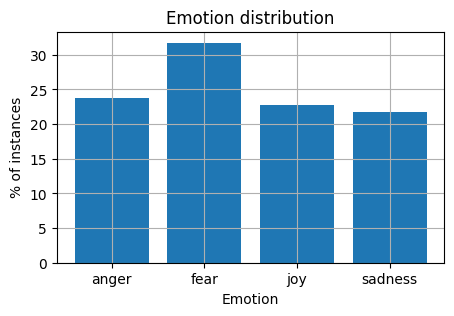

In [78]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## 2. Feature engineering
### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [79]:
from sklearn.feature_extraction.text import CountVectorizer

In [80]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer()

In [81]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [82]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [83]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [84]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [85]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [86]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [87]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [88]:
import nltk

nltk.download('punkt')

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize)

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



(3613, 500)

In [89]:
train_data_BOW_features_500.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       ...,
       [0, 3, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [90]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery',
       'come', 'comes', 'could', 'country'], dtype=object)

In [91]:
"😂" in feature_names_500

True

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [92]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_vectorizer.fit(train_df['text'])

train_data_tfidf_features = tfidf_vectorizer.transform(train_df['text'])

feature_names_tfidf = tfidf_vectorizer.get_feature_names_out()
feature_names_tfidf[100:110]

array(['bitter', 'black', 'blacks', 'blame', 'blessed', 'blood', 'bloody',
       'blues', 'body', 'boiling'], dtype=object)

---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [93]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [33]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['joy', 'joy', 'sadness', 'joy', 'fear', 'sadness', 'anger', 'joy',
       'joy', 'joy'], dtype=object)

---
## 4. Results Evaluation

Now we will check the results of our model's performance

In [34]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.68


In [35]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [36]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print(cm)

[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


In [56]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))

    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

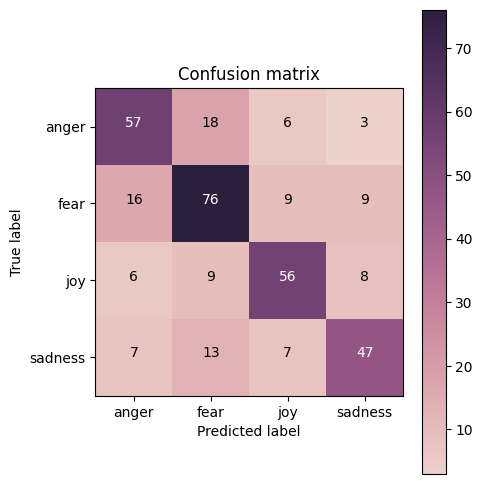

In [38]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

In [ ]:
# Answer here
"""
Fear appears to be the easiest emotion for the model to classify, as it has the highest number of correct classifications (76).
Joy also shows good performance with 56 correct classifications but has some misclassifications.
Sadness and Anger have more confusion with other emotions, particularly with fear, suggesting that the model finds it challenging to distinguish these emotions in some cases
"""

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results?

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

Accuracy (Word Frequency Features): 0.6974063400576369

Classification Report (Word Frequency Features):
               precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



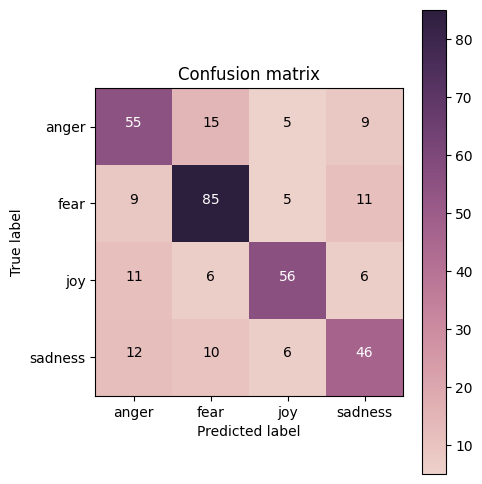

In [45]:
# Answer here
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)

print("Accuracy (Word Frequency Features):", accuracy_score(y_test, y_pred))
print("\nClassification Report (Word Frequency Features):\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
plot_confusion_matrix(cm, my_tags)

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [ ]:
# Answer here
"""
The Naive Bayes model outperforms the Decision Tree model in terms of overall accuracy and F1-scores.
This is likely because Naive Bayes handles text data more effectively by leveraging word frequencies probabilistically,
making it better at generalizing across different emotions. The Decision Tree, while flexible, may struggle with the
high dimensionality and sparsity often present in word frequency data, leading to slightly poorer performance.
"""

---

## 5. Other things you can try

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by:
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to.

---
## 6. Deep Learning

We use [Keras](https://keras.io/) to be our deep learning framework, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models.

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![pic1.png](https://github.com/davidshiao55/DM2024-Lab2-Master/blob/main/pics/pic1.png?raw=1)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


### 6.1 Prepare data (X, y)

In [46]:
import keras

# standardize name (X, y)
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [64]:
import keras

In [48]:
BOW_500.transform(test_df['text'])

<347x500 sparse matrix of type '<class 'numpy.int64'>'
	with 4103 stored elements in Compressed Sparse Row format>

### 6.2 Deal with categorical label (y)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves.

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [65]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 1397    fear
2087     joy
1039    fear
2490     joy
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


### 6.3 Build model

In [50]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![pic2.png](https://github.com/davidshiao55/DM2024-Lab2-Master/blob/main/pics/pic2.png?raw=1)

In [51]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          32,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax (Softmax)                    │ (None, 4)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,484 (142.52 KB)

 Trainable params: 36,484 (142.52 KB)

 Non-trainable params: 0 (0.00 B)

### 6.4 Train

In [52]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3283 - loss: 1.3581 - val_accuracy: 0.4496 - val_loss: 1.2644
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6030 - loss: 1.0943 - val_accuracy: 0.6369 - val_loss: 0.9263
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8033 - loss: 0.6196 - val_accuracy: 0.6974 - val_loss: 0.7939
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8554 - loss: 0.4138 - val_accuracy: 0.7003 - val_loss: 0.7990
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8895 - loss: 0.3276 - val_accuracy: 0.6859 - val_loss: 0.8064
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9086 - loss: 0.2679 - val_accuracy: 0.6945 - val_loss: 0.9101
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9238 - loss: 0.2293 - val_accuracy: 0.6916 - val_loss: 0.9293
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9452 - loss: 0.1821 - val_accuracy: 0.

### 6.5 Predict on testing data

In [53]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([[3.7045938e-05, 3.1743027e-02, 2.2792308e-02, 9.4542766e-01],
       [3.6426732e-06, 9.9440527e-01, 4.8457291e-03, 7.4523652e-04],
       [2.4872746e-03, 3.4032717e-01, 1.1894028e-03, 6.5599614e-01],
       [1.9042875e-11, 2.6014590e-10, 9.9999994e-01, 1.7977142e-10],
       [5.8532041e-03, 8.6038664e-02, 9.0588188e-01, 2.2262153e-03]],
      dtype=float32)

In [54]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['sadness', 'fear', 'sadness', 'joy', 'joy'], dtype=object)

In [55]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.67


In [56]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.370053,1.325399,0.449568,1.264365
1,1,0.640742,1.002264,0.636888,0.926310
2,2,0.791309,0.595062,0.697406,0.793878
3,3,0.848049,0.423857,0.700288,0.799019
4,4,0.878218,0.335360,0.685879,0.806359
5,5,0.900083,0.280366,0.694524,0.910069
6,6,0.921672,0.235345,0.691643,0.929286
7,7,0.933020,0.198529,0.685879,0.959626
8,8,0.950457,0.166087,0.685879,0.992558
9,9,0.954055,0.146003,0.685879,1.109619


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

![pic3.png](https://github.com/davidshiao55/DM2024-Lab2-Master/blob/main/pics/pic3.png?raw=1)


![pic4.png](https://github.com/davidshiao55/DM2024-Lab2-Master/blob/main/pics/pic4.png?raw=1)

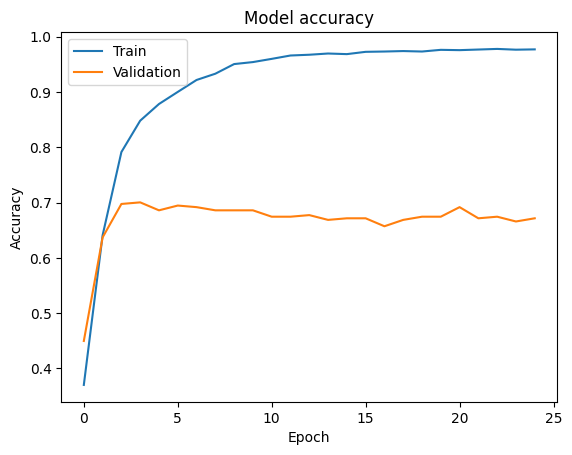

In [59]:
# Answer here
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(training_log['accuracy'])
plt.plot(training_log['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

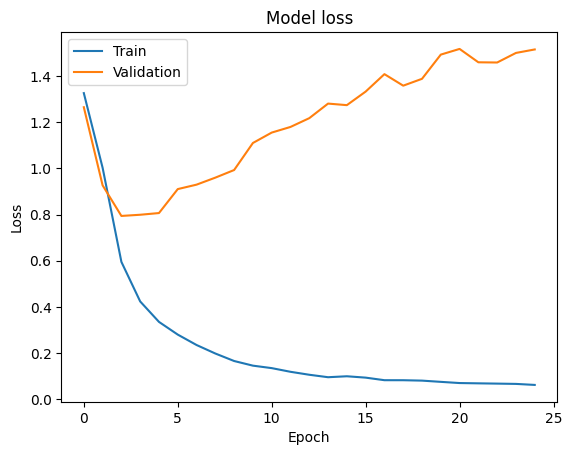

In [58]:
plt.plot(training_log['loss'])
plt.plot(training_log['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
"""
When a model performs well on training data but poorly on validation data, it indicates overfitting.
Overfitting occurs when the model is too complex for the amount of data, capturing noise rather
than underlying patterns.

This increasing validation loss while training loss decreases further confirms overfitting.
The model is optimizing to reduce training loss, but it is not improving on validation loss,
indicating that it is overfitting on the training data.
"""

---

### Note

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### More Information for your reference

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## 7. Word2Vector

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

### 7.1 Prepare training corpus

In [60]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
1254,20397,That's fucking horrific defending from Schalke,"[That, 's, fucking, horrific, defending, from,..."
3162,40335,@WestermannNina xDD it's a song that can not b...,"[@, WestermannNina, xDD, it, 's, a, song, that..."
1640,20783,Did you know I specialise in #anxiety and #pa...,"[Did, you, know, I, specialise, in, #, anxiety..."
3252,40425,went to Pet Supplies Plus tonight but @neitzke...,"[went, to, Pet, Supplies, Plus, tonight, but, ..."
1499,20642,she gone make me wanna start that new shit tod...,"[she, gone, make, me, wan, na, start, that, ne..."


In [61]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['That', "'s", 'fucking', 'horrific', 'defending', 'from', 'Schalke']),
       list(['@', 'WestermannNina', 'xDD', 'it', "'s", 'a', 'song', 'that', 'can', 'not', 'be', 'weary', '(', '?', ')']),
       list(['Did', 'you', 'know', 'I', 'specialise', 'in', '#', 'anxiety', 'and', '#', 'panic', 'attacks', '?', 'Get', 'in', 'touch', 'for', 'all', 'of', 'my', 'solutions', 'for', 'you', '.', '#', 'Coventry'])],
      dtype=object)

### 7.2 Training our model

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [62]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus,
                          vector_size=vector_dim, window=window_size,
                          min_count=min_count, epochs=training_epochs)

![Imgur](https://i.imgur.com/Fca3MCs.png)

### 7.3 Generating word vector (embeddings)

In [63]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.4528344 ,  0.51869583,  0.2923377 ,  0.20660788, -0.16362418,
       -0.91529304,  0.56913316,  1.108053  , -0.5399238 , -0.8882933 ,
       -0.4632446 , -0.6776243 , -0.52605134, -0.05865273,  0.08103629,
       -0.5618056 ,  0.421069  , -0.8413392 ,  0.03887155, -0.93165284,
        0.46807787,  0.5928949 ,  0.30436954, -0.02202608,  0.46279344,
        0.29584926, -0.9646716 ,  0.6227332 , -0.5221317 ,  0.09385256,
       -0.00794786, -0.07102089, -0.12351515, -0.80560625,  0.01995355,
        0.47662795,  0.36676398, -0.08752223, -0.62501615, -0.69717824,
       -0.19317834, -0.2181888 , -0.49235272,  0.33381185,  0.7373301 ,
       -0.3733025 , -0.8337181 ,  0.21367882,  0.5445599 ,  0.34305066,
       -0.3070812 , -0.8224315 ,  0.21541536, -0.14313968, -0.23568517,
       -0.45669913,  0.16645911, -0.3962593 , -0.06824946,  0.17770743,
       -0.0898692 , -0.26844057,  0.82548225,  0.17104322, -0.24985   ,
        0.7546279 , -0.15221266,  0.6869528 , -1.5123607 ,  0.79

In [64]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('HilltopBindery', 0.9185261130332947),
 ('blessed', 0.9173732995986938),
 ('blessing', 0.9146186709403992),
 ('cats', 0.9108472466468811),
 ('birthday', 0.9062743782997131),
 ('Be', 0.9059104323387146),
 ('right', 0.9040636420249939),
 ('handmade', 0.9019270539283752),
 ('smile', 0.9016620516777039),
 ('wet', 0.8987287282943726)]

### 7.4 Using a pre-trained w2v model

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### (1) Download model by yourself

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [70]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

#### (2) Using gensim api

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [71]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

[==================================================] 100.0% 104.8/104.8MB downloaded
load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158351421356201),
 ('thanks', 0.915008544921875),
 ('merry', 0.9053249359130859),
 ('bless', 0.902732253074646),
 ('wish', 0.9013164043426514)]

### 7.5 king + woman - man = ?

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [72]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence).
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [84]:
# Answer here
sentence = train_df['text'][0]
print(f'sentence:\n{sentence}')

vectors = [word2vec_model.wv[word] for word in sentence if word in word2vec_model.wv]
print(f'vectors mean:\n{np.mean(vectors, axis=0)}')

sentence:
How the fu*k! Who the heck! moved my fridge!... should I knock the landlord door. #angry #mad ##
vectors mean:
[-0.12426705  0.25230148  0.15893635  0.23412056 -0.0816806  -0.5494977
  0.20267329  0.6365754  -0.34659895 -0.4581162  -0.01588237 -0.34498462
 -0.01349264  0.1764945   0.10565502 -0.10392689  0.18322884 -0.31346294
 -0.17799129 -0.76387054  0.24922387  0.10160852  0.26312265 -0.25045377
  0.14114672  0.02008813 -0.25798348  0.2565961  -0.4071108  -0.04208739
  0.21568961 -0.06105078  0.17946644 -0.32135805 -0.09433904  0.27858078
  0.10086567 -0.00970415 -0.17380492 -0.49770692 -0.04779642 -0.2011739
 -0.37144476  0.04738612  0.14730161 -0.17290759 -0.33362123  0.11364325
  0.23228364  0.36087742  0.1354621  -0.21091771 -0.13208751 -0.07666152
 -0.0221114  -0.0246251   0.19175035 -0.05714563 -0.15305178  0.24890406
 -0.0289155   0.07616411  0.12125979  0.05768943 -0.23740155  0.36948866
 -0.02003161  0.37944064 -0.50471413  0.3033289   0.12163189  0.19828531
  0.2

## 8. Clustering: k-means

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### Basic concept

![Image](https://i.imgur.com/PEdUf54.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [77]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [78]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 1
word: fear 	 cluster: 1
word: angry 	 cluster: 1
word: car 	 cluster: 0
word: teacher 	 cluster: 0
word: computer 	 cluster: 0


![pic6.png](https://github.com/davidshiao55/DM2024-Lab2-Master/blob/main/pics/pic6.png?raw=1)

In [85]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0], dtype=int32)

In [86]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1], dtype=int32)


## 9. High-dimension Visualization: t-SNE and UMAP

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA, t-SNE and UMAP. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below with t-SNE:

![pic7.png](https://github.com/davidshiao55/DM2024-Lab2-Master/blob/main/pics/pic7.png?raw=1)

source: https://www.fabian-keller.de/research/high-dimensional-data-visualization

And also like this for UMAP:
![pic9-2.png](https://github.com/davidshiao55/DM2024-Lab2-Master/blob/main/pics/pic9.png?raw=1)

source: https://umap-learn.readthedocs.io/en/latest/auto_examples/plot_mnist_example.html

t-SNE and UMAP reference:  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
https://umap-learn.readthedocs.io/en/latest/

### 9.1 Prepare visualizing target

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [87]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


### 9.2 Plot using t-SNE and UMAP (2-dimension)

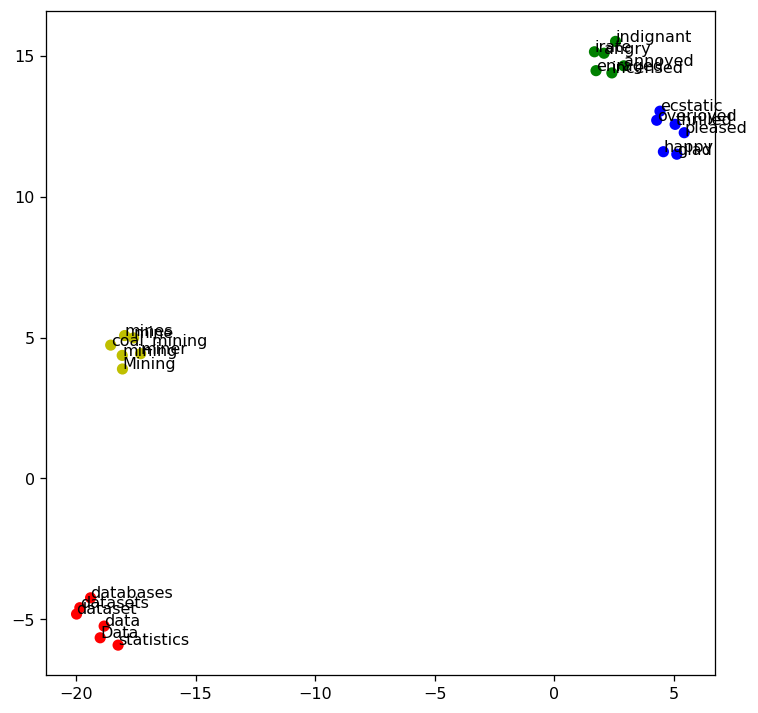

In [88]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

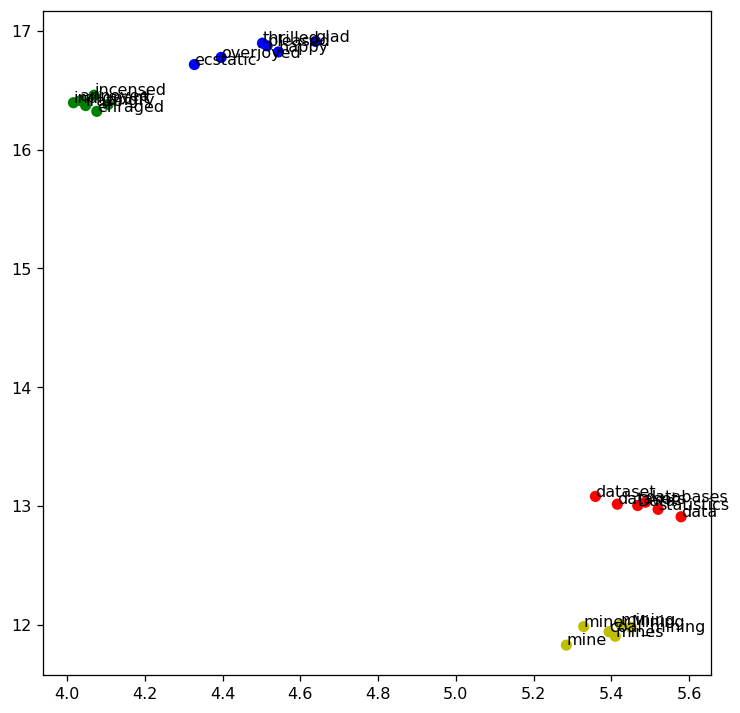

In [90]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()



### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

In [91]:
# Answer here
word_list = ['happy', 'angry', 'sad', 'fear']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
sad_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]
fear_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = happy_words + angry_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
sad_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'information', 'database', 'Data_System_IPEDS', 'data.The', 'OpenSpirit_enabled', 'datafeeds', 'microdata', 'operator_Telecity', 'GT_Datamaker', 'datawarehouse']
fear_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner', 'uranium_mining', 'miners', 'Mountaintop_removal_coal', 'goldmining', 'alluvial_mining', 'Ok_Tedi_copper', 'uranium_mines', 'coal_mines', 'openpit_mining', 'Mines']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 

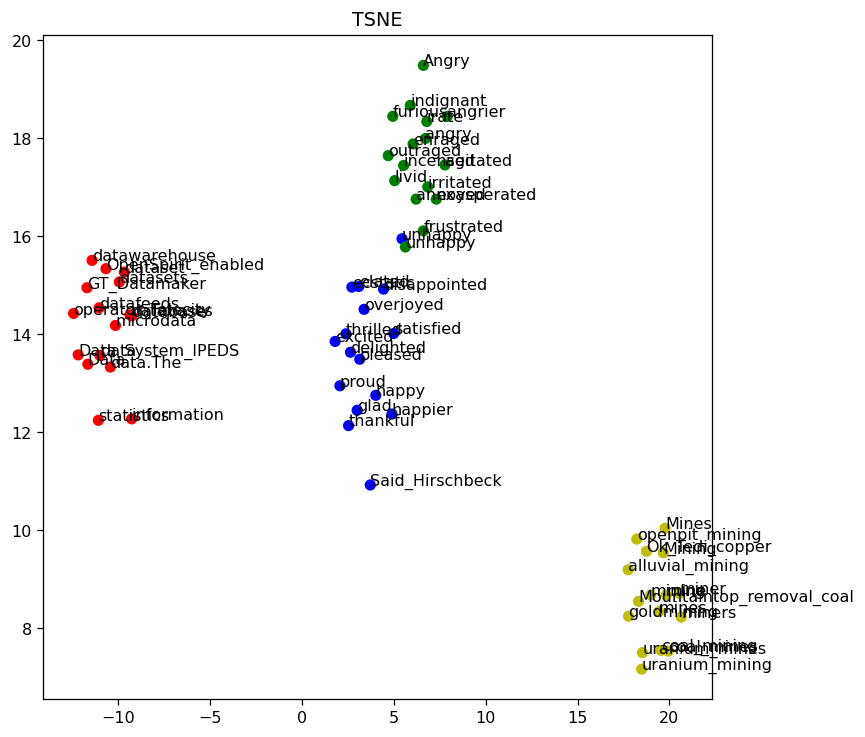

In [95]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.title('TSNE')
plt.show()

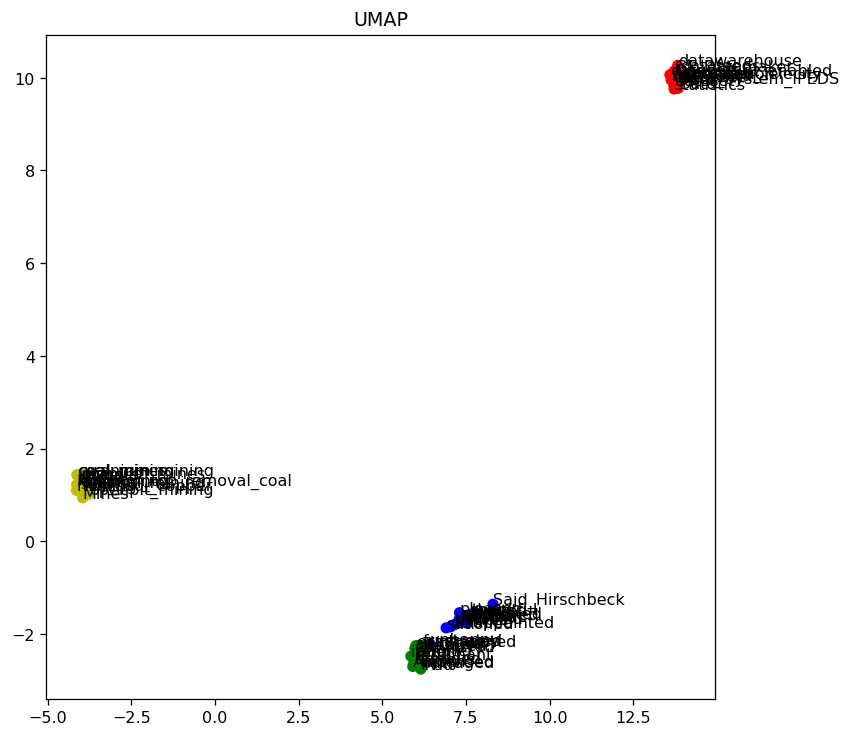

In [94]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.title('UMAP')
plt.show()

In [ ]:
"""
t-SNE captures similarities within emotion categories more distinctly. Positive
emotions (like "Happy," "Joyful") and negative emotions (like "Angry," "Frustrated")
are grouped together with clear visual separation.

UMAP, while it groups similar terms together, shows less distinct separation between
categories of emotions, and some categories overlap. However, it maintains close
proximity for highly similar terms.
"""

## 10. Large Language Models (LLMs)
Large Language Models (LLMs) are AI models trained on vast text data to understand and generate human language. Models like GPT and BERT excel at tasks like translation, summarization, and sentiment analysis due to their deep learning techniques and large-scale training. Recently these models got popular with the rise of Open-AI's ChatGPT and their different models, showcasing the potential of these models in a lot of aspects of our current society.

Open-source LLMs are cost-effective and customizable, with strong community support, but may underperform compared to paid models and require technical expertise to manage. Paid LLMs offer superior performance, ease of use, and regular updates, but are costly, less flexible, and create dependency on external providers for ongoing access and updates.

#### Open Source LLMs:
In this lab we are going to use Ollama ([Ollama GitHub Link](https://github.com/ollama/ollama)), that is a library that let us use a long list of open-source LLMs of differing size. For this section we are going to be using **'llama3.2'** or **'llama3.2:1b'** for **text based tasks**, and **'llava-phi3'** for **multi-modal tasks** (e.g. image to text). Ollama has a great variety of models, and those can be found here: [model library](https://ollama.com/library). You are free to explore them if you want to try using them, you can check the advantages and disadvantages of each.

Or they can also be observed in here:
![pic10.png](https://github.com/davidshiao55/DM2024-Lab2-Master/blob/main/pics/pic10.png?raw=1)

In the previous image we can observe that all LLMs have something called parameters, these are the internal weights that the model learns during training, helping it understand and generate language. The more a model has, the more complex and accurate it can be, but it also needs more memory to run.

For example:

Models with **7 billion parameters** need at least **8 GB of VRAM**.
**13 billion parameters** require **16 GB of VRAM**.
**33 billion parameters** need **32 GB of VRAM**.
The higher the number of parameters, the more memory and computational power the model needs to function efficiently.

And so that is why we are trying to use small LLMs for this practice, because they require a lot of computational resources, so by using 'llama3.2' and 'llava-phi3', both models with 3 billion parameters, we will only use at most 8 GB of VRAM. But if there are some issues with 'llama3.2' we can still use 'llama3.2:1b' the model with 1 billion parameters that requires less resources.

So now let's talk about the models:
**LLaMA 3.2** is part of the LLaMA series (Large Language Model Meta AI), designed to provide efficient language understanding and generation. Despite having fewer parameters than some larger models, it offers strong performance in NLP tasks, making it suitable for scenarios where both accuracy and resource efficiency are important.

**LLaVA** (Large Language and Vision Assistant) models, like **LLaVA-Phi3** are multimodal models combining language and vision capabilities. It can interpret visual inputs like images and generate corresponding text, making it ideal for tasks that require both visual understanding and language generation, such as image captioning and answering visual-based questions.

**I will be using the llama3.2 model going onwards, you can change it for the smallest version if it is necessary for you, or you can try to run it on Kaggle where you can use online GPU resources for it.**

### 10.1 Text Prompting
Like with ChatGPT we can use these models to ask about anything. Here we are going to ask a question and then ask it to return it in markdown format to make it look better afterwards.

In [9]:
!apt install -q pciutils
!curl -fsSL https://ollama.com/install.sh | sh
!pip install -q ollama

Reading package lists...
Building dependency tree...
Reading state information...
pciutils is already the newest version (1:3.7.0-6).
0 upgraded, 0 newly installed, 0 to remove and 54 not upgraded.
>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
############################################################################################# 100.0%
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> NVIDIA GPU installed.
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


In [10]:
!ollama serve &
!ollama run llama3.2

2024/11/11 10:18:05 routes.go:1189: INFO server config env="map[CUDA_VISIBLE_DEVICES: GPU_DEVICE_ORDINAL: HIP_VISIBLE_DEVICES: HSA_OVERRIDE_GFX_VERSION: HTTPS_PROXY: HTTP_PROXY: NO_PROXY: OLLAMA_DEBUG:false OLLAMA_FLASH_ATTENTION:false OLLAMA_GPU_OVERHEAD:0 OLLAMA_HOST:http://127.0.0.1:11434 OLLAMA_INTEL_GPU:false OLLAMA_KEEP_ALIVE:5m0s OLLAMA_LLM_LIBRARY: OLLAMA_LOAD_TIMEOUT:5m0s OLLAMA_MAX_LOADED_MODELS:0 OLLAMA_MAX_QUEUE:512 OLLAMA_MODELS:/root/.ollama/models OLLAMA_MULTIUSER_CACHE:false OLLAMA_NOHISTORY:false OLLAMA_NOPRUNE:false OLLAMA_NUM_PARALLEL:0 OLLAMA_ORIGINS:[http://localhost https://localhost http://localhost:* https://localhost:* http://127.0.0.1 https://127.0.0.1 http://127.0.0.1:* https://127.0.0.1:* http://0.0.0.0 https://0.0.0.0 http://0.0.0.0:* https://0.0.0.0:* app://* file://* tauri://* vscode-webview://*] OLLAMA_SCHED_SPREAD:false OLLAMA_TMPDIR: ROCR_VISIBLE_DEVICES: http_proxy: https_proxy: no_proxy:]"
time=2024-11-11T10:18:05.546Z level=INFO source=images.go:755

In [12]:
import threading
import subprocess

def start_ollama():
    subprocess.run(["ollama", "serve"])

def ollama_llama():
    subprocess.run(["ollama", "run", "llama3.2"])

# Start the server in a separate thread
ollama_thread = threading.Thread(target=start_ollama)
ollama_thread.start()

llama_thread = threading.Thread(target=ollama_llama)
llama_thread.start()

In [13]:
import ollama
response = ollama.chat(model='llama3.2', messages=[
    {
        'role': 'user',
        'content': 'What is data mining? (in markdown format)'
    },
])

print(response['message']['content'])

**Data Mining**

### Definition

Data mining is the process of automatically discovering patterns, relationships, and insights from large datasets. It involves using algorithms and statistical techniques to extract valuable knowledge or decisions from a large set of data.

### Types of Data Mining

#### 1. **Supervised Learning**

In supervised learning, the algorithm is trained on labeled data to learn the relationship between input variables and output labels.

*   Example: Image classification, sentiment analysis
*   Algorithm: Decision Trees, Random Forests, Support Vector Machines (SVM)

#### 2. **Unsupervised Learning**

In unsupervised learning, the algorithm discovers patterns or structure in the data without prior knowledge of the output labels.

*   Example: Clustering customers based on purchasing behavior, dimensionality reduction
*   Algorithm: K-Means, Hierarchical Clustering, Principal Component Analysis (PCA)

#### 3. **Semi-Supervised Learning**

In semi-supervised lea

**We can use the IPython library to make the response look better:**

In [14]:
from IPython.display import display, Markdown, Latex
display(Markdown('*some markdown* $\phi$'))

*some markdown* $\phi$

In [15]:
display(Markdown(response['message']['content']))

**Data Mining**
================

### Definition

Data mining is the process of automatically discovering patterns, relationships, and insights from large datasets. It involves using algorithms and statistical techniques to extract valuable knowledge or decisions from a large set of data.

### Types of Data Mining

#### 1. **Supervised Learning**

In supervised learning, the algorithm is trained on labeled data to learn the relationship between input variables and output labels.

*   Example: Image classification, sentiment analysis
*   Algorithm: Decision Trees, Random Forests, Support Vector Machines (SVM)

#### 2. **Unsupervised Learning**

In unsupervised learning, the algorithm discovers patterns or structure in the data without prior knowledge of the output labels.

*   Example: Clustering customers based on purchasing behavior, dimensionality reduction
*   Algorithm: K-Means, Hierarchical Clustering, Principal Component Analysis (PCA)

#### 3. **Semi-Supervised Learning**

In semi-supervised learning, the algorithm uses a combination of labeled and unlabeled data to learn patterns.

*   Example: Image classification with a few labeled images
*   Algorithm: Graph Convolutional Networks (GCNs), Self-Training

### Data Mining Techniques

#### 1. **Classification**

Classification involves predicting categorical labels or outcomes from input data.

*   Example: Spam vs. non-spam emails, medical diagnosis
*   Algorithm: Naive Bayes, Logistic Regression, Random Forests

#### 2. **Regression**

Regression involves predicting continuous outputs from input data.

*   Example: Predicting house prices based on features like location and size
*   Algorithm: Linear Regression, Decision Trees, Gradient Boosting Machines (GBMs)

#### 3. **Clustering**

Clustering involves grouping similar data points together based on their characteristics.

*   Example: Customer segmentation based on buying behavior
*   Algorithm: K-Means, Hierarchical Clustering, DBSCAN

### Applications of Data Mining

#### 1. **Marketing**

Data mining helps businesses analyze customer behavior and preferences to improve marketing strategies.

*   Example: Personalized product recommendations, targeted advertising
*   Tool: CRM software, Google Analytics

#### 2. **Healthcare**

Data mining is used in healthcare to identify patterns in patient data and develop predictive models for disease diagnosis and treatment.

*   Example: Predicting patient outcomes based on medical history and genetic data
*   Algorithm: Random Forests, Support Vector Machines (SVM), Neural Networks

#### 3. **Finance**

Data mining helps financial institutions analyze market trends and predict stock prices to make informed investment decisions.

*   Example: Predicting stock prices based on historical data and news sentiment analysis
*   Tool: Trading platforms, data visualization software

### Challenges in Data Mining

#### 1. **Data Quality Issues**

Poor data quality can lead to biased or inaccurate results in data mining models.

*   Solution: Data preprocessing techniques like data cleaning and feature engineering.

#### 2. **Overfitting**

Overfitting occurs when a model is too complex and performs well on training data but poorly on new, unseen data.

*   Solution: Regularization techniques like L1 and L2 regularization, early stopping.

#### 3. **Scalability**

Large datasets can be challenging to process and store in traditional databases.

*   Solution: Distributed computing frameworks like Apache Spark, NoSQL databases like MongoDB.

### Conclusion

Data mining is a powerful tool for discovering insights and patterns from large datasets. By applying various techniques and algorithms, data miners can extract valuable knowledge and make informed decisions in fields like marketing, healthcare, and finance.


### ** >>> Exercise 9 (Take home): **  

You noticed there is a **role** parameter inside the ollama.chat function, investigate what other roles there can be inside the function and what do they do. Give an example of a prompt using another role in additional to the **user** one.

In [26]:
# Answer here
import ollama
response = ollama.chat(
    model="llama3.2",
    messages=[
        {
            "role": "assistant",
            "content": "You are a helpful assistant knowledgeable in data science and programming.(in markdown format)"
        },
    ]
)

display(Markdown(response['message']['content']))

## AI Assistant

### Overview
I can be used to answer questions, provide information, and even generate text. My responses are based on my training data, which is constantly updated and expanded.

### Capabilities

*   Answering questions
*   Generating text
*   Data analysis and interpretation
*   Basic programming

### Limitations
My knowledge cutoff date is December 2023, and I may not have the latest information on very recent events.

In [22]:
response = ollama.chat(
    model="llama3.2",
    messages=[
        {
            "role": "user",
            "content": "You are a helpful assistant knowledgeable in data science and programming.(in markdown format)"
        },
    ]
)

display(Markdown(response['message']['content']))

**Data Science and Programming Assistant**
=============================================

I'm here to help you with your data science and programming questions. Whether it's Python, R, SQL, or any other language, I'll do my best to provide clear explanations, examples, and solutions.

### My Knowledge Areas

* **Programming languages**: Python, R, Java, C++, JavaScript
* **Data science libraries**: NumPy, pandas, Matplotlib, Scikit-learn, TensorFlow, Keras
* **Database management**: SQL, NoSQL databases (e.g., MongoDB, Cassandra)
* **Machine learning**: Supervised and unsupervised learning, neural networks, deep learning
* **Statistics and data visualization**: Descriptive statistics, inferential statistics, data visualization tools (e.g., Tableau, Power BI)

### How to Ask for Help

Feel free to ask me any questions you have about data science or programming. I'll do my best to:

* Provide clear explanations and examples
* Offer code snippets and solutions
* Help with debugging and troubleshooting
* Point you in the right direction if I'm not familiar with a specific topic

### Example Use Cases

Want to learn how to:

* **Analyze a dataset**: Use pandas and NumPy to clean, transform, and visualize data.
* **Build a machine learning model**: Use Scikit-learn or TensorFlow to build a supervised or unsupervised learning model.
* **Create a web application**: Use Python and Flask (or Django) to build a web application.

### Let's Get Started!

What's on your mind? Do you have a specific question or problem you'd like help with?

### 10.2 Multi-Modal Prompting - Text + Images
Multi-modal prompting involves using input from multiple sources or modes, such as text, images, or audio, to guide a model's response. It allows AI to process and generate information based on more than one type of input.

For image plus text prompting, the model receives both an image and a related text prompt. The image provides visual context, while the text gives additional guidance. The model uses both inputs to generate more accurate and contextually relevant responses, which is useful for tasks like image captioning, visual question answering, or content generation based on visual cues.

Let's look at the following images that are in the **pics** folder in the directory of this notebook:

![example1.png](https://github.com/davidshiao55/DM2024-Lab2-Master/blob/main/pics/example1.png?raw=1)
source: https://cooljapan-videos.com/tw/articles/epe0y86g

![example2.jpg](https://github.com/davidshiao55/DM2024-Lab2-Master/blob/main/pics/example2.jpg?raw=1)
source: https://www.istockphoto.com/photo/young-cat-scottish-straight-gm1098182434-294927481

We will use the **llava-phi3** model that we installed to request a description of the images:

In [31]:
def ollama_llavaphi3():
    subprocess.run(["ollama", "run", "llava-phi3"])

# Start the server in a separate thread
llavaphi3_thread = threading.Thread(target=ollama_llavaphi3)
llavaphi3_thread.start()

In [33]:
import ollama
response2 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['./pics/example1.png'] #Image with the dog
    },
])

display(Markdown(response2['message']['content']))

The image depicts a **Shiba Inu dog** in the midst of an energetic run. The dog, with its distinctive tan and white coat, is captured mid-air, showcasing its agility and speed. Its tail is fully extended behind it, adding to the sense of motion in the image.

The Shiba Inu's paws are visibly off the ground, further emphasizing its leap. The dog appears to be running on a **grassy lawn** which fills most of the background of the photo. The grass is lush and green, providing a stark contrast to the dog's tan coat.

In addition to the grassy field, there are also some trees visible in the background. Their leaves form a blurred backdrop that helps to isolate the running dog as the main focus of the image.

Overall, this dynamic scene captures a playful moment in nature, with the Shiba Inu dog as the star of the show.

In [34]:
response3 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['./pics/example2.jpg'] #Image with the cat
    },
])

display(Markdown(response3['message']['content']))

The image showcases a **gray tabby cat** with black stripes. The cat's fur has distinctive swirls, adding to its unique appearance. It stands on all fours against a stark white background, which contrasts beautifully with the gray of its coat and highlights its features. The cat's tail is raised high in the air, indicating alertness or curiosity. Its head is turned to one side, as if it's attentively observing something out of frame. The cat appears calm and composed, embodying the graceful poise often associated with felines. There are no other objects or creatures in the image, making the cat the sole focus of this photograph.


### ** >>> Exercise 10 (Take home): **  

Try asking the model with one image of your choosing. Is the description accurate? Why?

Test image of john mayer
![john mayer](https://github.com/davidshiao55/DM2024-Lab2-Master/blob/main/pics/johnmayer.jpg?raw=1)

In [37]:
# Answer here
response3 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['./pics/johnmayer.jpg'] #Image with the john mayer
    },
])

display(Markdown(response3['message']['content']))

In the center of this vibrant image, a man with dark hair and a beard sits at a pink table. He's dressed in a purple jacket adorned with a blue stripe down the side, adding a splash of color to his attire. His attention is focused on a silver guitar resting on its stand next to him. The guitar features a unique design - it has black and white keys instead of traditional strings.

The table he's seated at is covered in pink paper, giving off an artistic vibe. Behind him, the background transitions from blue-green to pink, creating a visually pleasing gradient effect that complements the overall color scheme of the image. The man appears engrossed and ready to create music with his distinctive instrument.

### 10.3 Retrieval-Augmented Generation (RAG)
RAG (Retrieval-Augmented Generation) is a technique where a language model combines document retrieval with text generation. In RAG, a retrieval system first finds relevant documents or text chunks, and then the language model uses this retrieved information to generate a more informed and accurate response. This method enhances the model's ability to answer questions by grounding its responses in real, external data.

In the following code, we will load a webpage as a document, which allows us to retrieve text from a URL. After loading the content, we will split the document into smaller, manageable chunks, making it easier for our model to process. Then, we'll generate embeddings for these chunks with a specified LLM model (e.g., Llama3.2). These embeddings will be stored in a vector database, which enables us to perform similarity searches. By setting up this retrieval system, we can use a RAG chain to answer questions. The retriever finds relevant text chunks from the document based on a query, and the LLM generates a response by incorporating this retrieved information, making the answers more grounded and accurate.

In [39]:
import ollama
import bs4
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import OllamaEmbeddings
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

llm_model = "llama3.2" #You can change to the one of your preference

# Function to load, split, and retrieve documents
def load_and_retrieve_docs(url):
    loader = WebBaseLoader(
        web_paths=(url,),
        bs_kwargs=dict()
    )
    docs = loader.load() #We will load the URL that will serve as our data source
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200) #We will divide the URL in chunks of text for easier comparison in the vector space
    splits = text_splitter.split_documents(docs)
    #print(splits) #You can print this to see how the chunks in the url where split
    embeddings = OllamaEmbeddings(model=llm_model) #Generating embeddings with our chosen model
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings) #Our vector space for comparison
    return vectorstore.as_retriever()

url="https://www.ibm.com/topics/large-language-models"
# Create the retriever
retriever = load_and_retrieve_docs(url)

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs) #Format the retrieved docs in an orderly manner for prompting

# Define the Ollama LLM function
def ollama_llm(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model='llama3.2', messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the RAG chain
def rag_chain(question):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return ollama_llm(question, formatted_context)

# Use the RAG chain
result = rag_chain("What are the related solutions of IBM with LLMs?")
display(Markdown(result))

IBM's related solutions with LLMs include:

1. Watsonx.ai: This platform uses IBM's Granite model series as its generative AI backbone, enabling it to provide a range of NLP capabilities, including text generation, language translation, and content summarization.

2. Watsonx Assistant: This is an AI-powered chatbot service that leverages the power of LLMs to provide conversational interfaces for customers and users.

3. Watsonx Orchestrate: This is another IBM product that utilizes the Granite model series to provide a range of NLP capabilities, including content generation and language processing tasks.

These solutions demonstrate IBM's commitment to incorporating LLM technology into its products and services, enhancing its natural language understanding (NLU) and natural language processing (NLP) capabilities.


### **Actual content in the URL:**
![pic11.png](https://github.com/davidshiao55/DM2024-Lab2-Master/blob/main/pics/pic11.png?raw=1)

source: https://www.ibm.com/topics/large-language-models



### ** >>> Exercise 11 (Take home): **  

Try to modify the code to make it accept **three URLs**, or **three text documents** of your choosing. After modifying it, make **three prompts/questions** with information that can be found in each of the documents/urls, **compare the accuracy of the response** with the actual answer. Investigate and discuss the advantages and disadvantages of RAG systems.

In [40]:
# Answer here
import ollama
from bs4 import BeautifulSoup as bs4
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import OllamaEmbeddings
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from IPython.display import display, Markdown

llm_model = "llama3.2"

# Modified function to load, split, and retrieve documents from multiple URLs
def load_and_retrieve_docs(urls):
    all_splits = []
    for url in urls:
        loader = WebBaseLoader(
            web_paths=(url,),
            bs_kwargs=dict()
        )
        docs = loader.load()
        text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
        splits = text_splitter.split_documents(docs)
        all_splits.extend(splits) # Accumulate splits from all URLs
    embeddings = OllamaEmbeddings(model=llm_model)
    vectorstore = Chroma.from_documents(documents=all_splits, embedding=embeddings)
    return vectorstore.as_retriever()

# List of URLs
urls = [
    "https://www.ibm.com/topics/large-language-models",
    "https://www.ibm.com/topics/natural-language-processing",
    "https://www.ibm.com/cloud/learn/machine-learning"
]

# Create the retriever
retriever = load_and_retrieve_docs(urls)

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

# Define the Ollama LLM function
def ollama_llm(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model='llama3.2', messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the RAG chain
def rag_chain(question):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return ollama_llm(question, formatted_context)

# Test the RAG system with three different prompts
questions = [
    "What are the related solutions of IBM with large language models?",
    "How does IBM use natural language processing in its products?",
    "What services does IBM offer in machine learning?"
]

for question in questions:
    result = rag_chain(question)
    display(Markdown(f"### Question: {question}\n\n{result}\n"))

### Question: What are the related solutions of IBM with large language models?

Based on the provided information, IBM's related solutions for large language models (LLMs) include:

1. **Watsonx.ai**: A platform that hosts IBM's Granite model series, which serves as a generative AI backbone for other IBM products like Watson Assistant and Watson Orchestrate.
2. **Watson Assistant**: An AI-powered chatbot service that utilizes the Granite model series to provide human-like conversations with customers.
3. **Watsonx Orchestrate**: A platform that leverages the Granite model series to automate tasks, such as text analysis, sentiment detection, and content generation.
4. **Granite model series**: A family of LLMs developed by IBM, which are designed to understand and generate human-like text, among other tasks.

These solutions demonstrate IBM's commitment to developing and integrating large language models into its products and services, making it a significant player in the field of artificial intelligence and natural language processing.


### Question: How does IBM use natural language processing in its products?

IBM uses natural language processing (NLP) in its products through various machine learning models and techniques, including:

1. Speech recognition: IBM incorporates speech recognition capabilities into its systems to enable voice search and improve accessibility for texting.
2. Customer service: Online chatbots are used to answer frequently asked questions and provide personalized advice, cross-selling products, and suggesting sizes for users.
3. Virtual assistants: IBM's virtual assistants, such as Watson Assistant and Watson Orchestrate, use LLMs to understand and respond to user queries in a human-like manner.

Additionally, IBM has recently launched its Granite model series on watsonx.ai, which serves as the generative AI backbone for other IBM products. This indicates that IBM is heavily investing in NLP and LLM capabilities to enhance its natural language understanding (NLU) and processing (NLP) abilities.

Some specific examples of IBM's NLP-powered products include:

* Watson Assistant: a cloud-based AI service that uses LLMs to power conversational interfaces, such as chatbots and virtual assistants.
* Watson Orchestrate: an enterprise-grade AI platform that integrates with other Watson services to provide real-time insights and recommendations.
* watsonx.ai: a cloud-based platform that provides access to IBM's Granite model series, enabling developers to build and deploy their own NLP-powered applications.

By leveraging NLP and LLM capabilities, IBM aims to improve the efficiency and effectiveness of its products and services, while also providing a more human-like experience for users.


### Question: What services does IBM offer in machine learning?

IBM offers a wide range of services to support machine learning, including:

1. **IBM Watson**: A cloud-based AI platform that provides natural language processing (NLP) and machine learning capabilities to help organizations make sense of large amounts of data.
2. **IBM Cloud AI Services**: A set of cloud-based AI services that include machine learning, deep learning, and NLP capabilities.
3. **IBM Data Science Experience**: An open-source platform for building and deploying data science applications, including those using machine learning models.
4. **IBM Watson Studio**: A cloud-based AI platform that provides a range of tools and services for building, training, and deploying machine learning models.
5. **Hybrid Cloud Services**: IBM offers hybrid cloud solutions that allow organizations to deploy machine learning workloads on-premises or in the cloud, depending on their needs.
6. **AI Consulting Services**: IBM provides consulting services to help organizations implement AI and machine learning solutions across various industries.
7. **Machine Learning as a Service (MLaaS)**: IBM offers MLaaS to help organizations build, train, and deploy machine learning models without requiring extensive expertise in machine learning.
8. **IBM Watson Assistant**: A cloud-based conversational AI platform that provides NLP capabilities to help organizations build chatbots and virtual assistants.

These services are designed to help organizations of all sizes and industries to leverage machine learning and AI to drive innovation, improve efficiency, and enhance customer experiences.


In [ ]:
"""
ACCURATE!!!

Advantages and Disadvantages of RAG Systems
Advantages

Accurate Contextual Responses: RAG systems can dynamically pull the most relevant information for a question, especially when covering specific domains or company-related topics, as seen in the precise responses here.
Flexible Knowledge Updates: Unlike static models, RAG systems update with the latest information from sources, making them more adaptable for contexts where real-time data is valuable.
Reduction in Model Training: RAG systems allow models to operate without needing explicit training on every piece of knowledge since they can retrieve relevant data in real time.

Disadvantages

Reliance on Document Quality and Relevance: If the documents retrieved lack depth or relevance, the RAG system may fail to answer correctly, highlighting a reliance on effective retrieval and quality data sources.
Latency and Computational Complexity: Retrieving, processing, and embedding data adds to computational load, potentially slowing down responses, especially if many documents are queried.
Complexity in Fine-Tuning: RAG systems require tuning of the retrieval and generation components, as well as embedding models, to ensure accurate and contextually relevant answers.
"""

### 10.4 Generating LLM Embeddings:
LLM embeddings are dense vector representations of text generated by Large Language Models. These embeddings, like we have already seen in the lab, capture the semantic meaning and relationships between words, phrases, or even entire documents by mapping them into a high-dimensional space where similar pieces of text are placed closer together. What makes LLM embeddings special is that they are contextual and rich in meaning, meaning the same word can have different embeddings based on its surrounding context.

For example, the word **"bank"** would have different embeddings in the sentences **"I sat by the river bank"** and **"I deposited money in the bank."** This ability to understand and encode context enables LLM embeddings to outperform traditional techniques (like TF-IDF or one-hot encoding) by providing a deeper, more nuanced representation of language.

Additionally, LLM embeddings are pre-trained on vast amounts of data, allowing them to generalize well across different tasks (like classification, clustering, or similarity detection) without the need for extensive retraining. This makes them highly valuable in many natural language processing tasks today.

**Now let's generate some embeddings with llama 3.2 for our dataset:**

In [46]:
import pandas as pd
import ollama

# Let's copy our dataframes for training and testing
df_train = train_df
df_test = test_df
# Define a function to generate embeddings
def generate_embeddings(row,text_column_name='text'):
    embeddings = ollama.embeddings(
        model='llama3.2',
        prompt=row[text_column_name],
    )
    return embeddings["embedding"]

In [47]:
# We use the text column
column_name = 'text'

# Apply the function to the specified column and store the result in a new column 'embeddings'
df_train['embeddings'] = df_train.apply(lambda row: generate_embeddings(row, column_name), axis=1)

In [48]:
df_test['embeddings'] = df_test.apply(lambda row: generate_embeddings(row, column_name), axis=1)

In [49]:
df_train #We can see the new column with the embeddings

,id,text,emotion,intensity,embeddings
1397,20540,Who's afraid of the clowns???\ncomment down th...,fear,0.500,"[-1.503389596939087, -1.4592413902282715, -0.8..."
2087,30083,@JackAndJack I'm so lively for listen💗😀,joy,0.771,"[0.08429709076881409, -1.3312517404556274, 1.1..."
1039,20182,&gt;.&lt; too much clutter in my brain with re...,fear,0.693,"[-0.9669413566589355, -0.8552764058113098, 1.7..."
2490,30486,@JoshuaLenon I trust you know that I appreciat...,joy,0.440,"[0.7479832172393799, -0.5210375785827637, -1.7..."
3470,40643,Kinda wanna just book a vacation and go...anyo...,sadness,0.312,"[0.9407269358634949, -1.0843372344970703, 0.21..."
...,...,...,...,...,...
2680,30676,@FlannelJedi This is why I drink and watch You...,joy,0.292,"[0.9944406151771545, 1.3619083166122437, -3.38..."
110,10110,@jennylhowe I am angry at the student for bein...,anger,0.708,"[-1.3393787145614624, 2.4224448204040527, -2.4..."
204,10204,Forever angry that gh ruined Molly and morgan'...,anger,0.625,"[-0.5680213570594788, 0.07578764110803604, -0...."
2277,30273,Watching Avatar and wondering why I took so lo...,joy,0.580,"[0.986572265625, 0.033845141530036926, -2.5848..."


In [50]:
df_test #We can see the new column with the embeddings

,id,text,emotion,intensity,embeddings
84,21147,I know this is going to be one of those nights...,fear,0.771,"[-0.704751193523407, 0.09806451201438904, -3.2..."
158,21221,Thanks for ripping me off again #Luthansa €400...,fear,0.521,"[0.542023777961731, 3.824819564819336, -1.2280..."
242,30871,@hesham786 that's the spirit #optimism,joy,0.396,"[-2.661088228225708, 0.23052436113357544, 0.00..."
109,21172,@TheDappaMc also £2.50 for a chocolate Feast i...,fear,0.438,"[0.9877256155014038, 0.9043328762054443, 1.838..."
288,40801,@OHSOVICTORIOUS_ @FaZeAdapt We all seen it com...,sadness,0.354,"[0.3767952620983124, 0.15029023587703705, -0.1..."
...,...,...,...,...,...
215,30844,@NateBLoL no it was that clear American natura...,joy,0.312,"[-0.2205106019973755, 1.0445950031280518, 1.58..."
183,21246,@AaliyahLove69 I would be intimidated but I wo...,fear,0.417,"[-1.187813401222229, 0.8728631734848022, -1.54..."
124,21187,⊰ @FrameOfAnAngel ⊱ \n\n+ Of them. I'm here fo...,fear,0.583,"[-1.3794784545898438, -0.6030275821685791, 1.6..."
169,21232,@mikefreemanNFL \nIsn't OBrien supposed to be ...,fear,0.479,"[0.2047320455312729, 0.8301156163215637, -0.34..."


Now let's train some models with these embeddings:

**KNeighborsClassifier (KNN)**: KNN is a simple, instance-based machine learning algorithm used for classification. It works by finding the 'k' nearest neighbors to a data point based on a distance metric (e.g., Euclidean distance) and assigning the most common class among those neighbors to the data point. KNN is non-parametric, meaning it doesn’t assume a specific form for the underlying data distribution, and it classifies points based on their similarity to other points in the training set. It's easy to understand and implement, though it can become computationally expensive with large datasets.

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Let's use the new Llama 3.2 embeddings as our training features and the emotions as our labels
X_train = df_train["embeddings"].tolist()
y_train = df_train['emotion']


# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [52]:
len(df_train["embeddings"][0]) # Llama 3.2 embedding dimension is 3072

3072

In [53]:
X_test = df_test["embeddings"].tolist()
y_test = df_test['emotion']

# Predicting the label for the test data
y_pred = knn.predict(X_test)

#Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f'KNN Accuracy: {accuracy}')

KNN Accuracy: 0.4553314121037464


In [54]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

       anger       0.41      0.45      0.43        84
        fear       0.50      0.52      0.51       110
         joy       0.45      0.42      0.43        79
     sadness       0.45      0.41      0.43        74

    accuracy                           0.46       347
   macro avg       0.45      0.45      0.45       347
weighted avg       0.46      0.46      0.45       347



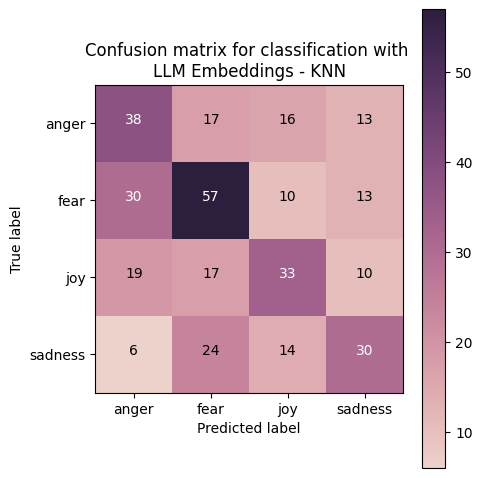

In [57]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm2 = confusion_matrix(y_true=y_test, y_pred=y_pred)
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm2, classes=my_tags, title='Confusion matrix for classification with \nLLM Embeddings - KNN')

Now let's also try to apply our **Neural Network** to these embeddings:

In [58]:
X_llama_train = np.vstack(df_train["embeddings"].to_numpy()) #Defining our train set

In [59]:
X_llama_test = np.vstack(df_test["embeddings"].to_numpy()) #Defining our test set

In [60]:
X_llama_train.shape #(Number of data, Llama 3.2 embedding size)

(3613, 3072)

In [61]:
X_llama_test.shape #(Number of data, Llama 3.2 embedding size)

(347, 3072)

In [94]:
#One-hot encoding our labels
y_train_llama = label_encode(label_encoder, y_train)
y_test_llama = label_encode(label_encoder, y_test)

In [95]:
# I/O check
input_shape_llama = len(X_llama_train[0])
print('input_shape: ', input_shape_llama)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  3072
output_shape:  4


In [96]:
#We try the same Neural Network Model Again
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape_llama, ))  # 3072
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary() #We can notice that our parameter numbers went up because of the increase in the dimension of our input

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         196,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax (Softmax)                    │ (None, 4)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 201,092 (785.52 KB)

 Trainable params: 201,092 (785.52 KB)

 Non-trainable params: 0 (0.00 B)

In [97]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log_2.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_llama_train, y_train_llama,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[csv_logger],
                    validation_data = (X_llama_test, y_test_llama))
print('training finish')

Epoch 1/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.2532 - loss: 1.5928 - val_accuracy: 0.3199 - val_loss: 1.4020
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3190 - loss: 1.3699 - val_accuracy: 0.3170 - val_loss: 1.3816
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3430 - loss: 1.3387 - val_accuracy: 0.2594 - val_loss: 1.4136
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3682 - loss: 1.3060 - val_accuracy: 0.2968 - val_loss: 1.4001
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4040 - loss: 1.2589 - val_accuracy: 0.2738 - val_loss: 1.5056
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4606 - loss: 1.1690 - val_accuracy: 0.2911 - val_loss: 1.4486
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4821 - loss: 1.1490 - val_accuracy: 0.2911 - val_loss: 1.5947
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5459 - loss: 1.0353 - val_accuracy: 0

In [98]:
## predict
pred_result = model.predict(X_llama_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step


array([[4.2292007e-04, 3.4691811e-01, 4.1394702e-01, 2.3871195e-01],
       [9.9751210e-01, 2.4316213e-03, 4.4584274e-05, 1.1712772e-05],
       [3.4578327e-02, 4.3419713e-01, 3.8432900e-02, 4.9279171e-01],
       [3.5477185e-04, 9.5667308e-03, 9.9006319e-01, 1.5397578e-05],
       [6.5972828e-03, 1.0346103e-02, 9.4102412e-01, 4.2032558e-02]],
      dtype=float32)

In [99]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['joy', 'anger', 'sadness', 'joy', 'joy'], dtype=object)

In [100]:
from sklearn.metrics import accuracy_score
#Accuracy
print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test_llama), pred_result), 2)))

testing accuracy: 0.27


In [101]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log_2.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.273457,1.464885,0.319885,1.402015
1,1,0.318849,1.369035,0.317003,1.381619
2,2,0.335732,1.343913,0.259366,1.413630
3,3,0.364517,1.314206,0.296830,1.400080
4,4,0.407141,1.257242,0.273775,1.505625
5,5,0.442292,1.203340,0.291066,1.448592
6,6,0.490451,1.131078,0.291066,1.594691
7,7,0.539441,1.041132,0.259366,1.648731
8,8,0.577636,0.961185,0.247839,1.693391
9,9,0.636037,0.870375,0.270893,1.915347


In [102]:
print(classification_report(y_true=label_decode(label_encoder, y_test_llama), y_pred=pred_result))

              precision    recall  f1-score   support

       anger       0.23      0.30      0.26        84
        fear       0.30      0.30      0.30       110
         joy       0.28      0.34      0.31        79
     sadness       0.30      0.14      0.19        74

    accuracy                           0.27       347
   macro avg       0.28      0.27      0.26       347
weighted avg       0.28      0.27      0.27       347



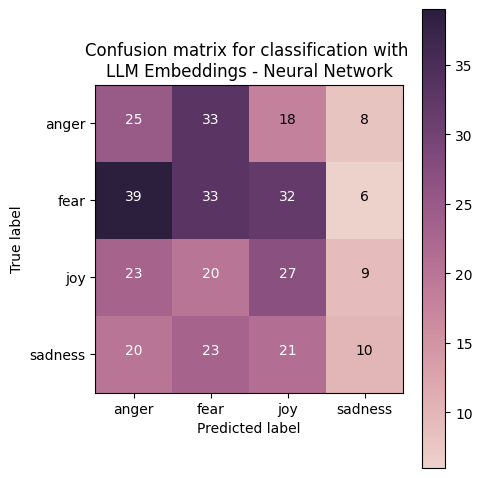

In [103]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm3 = confusion_matrix(y_true=label_decode(label_encoder, y_test_llama), y_pred=pred_result)
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm3, classes=my_tags, title='Confusion matrix for classification with \nLLM Embeddings - Neural Network')

### ** >>> Exercise 12 (Take home): **

Follow Exercise 6 again and Plot the Training and Validation Accuracy and Loss for the results of this Neural Network. Compare the results of both KNN and the NN we just implemented. Discuss about why we obtained these results with the LLM Embeddings compared to the results of the other models implemented in this Lab.

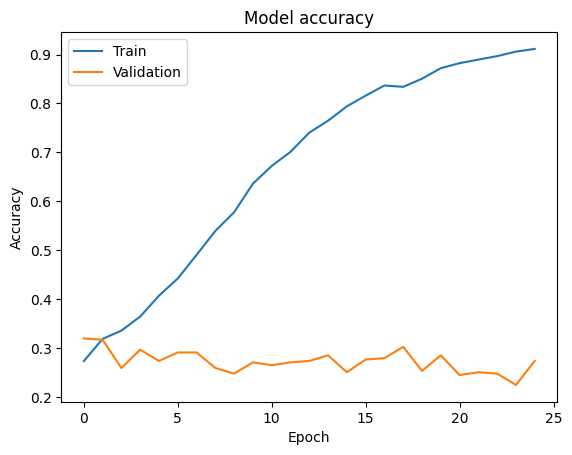

In [104]:
# Answer here
# Answer here
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(training_log['accuracy'])
plt.plot(training_log['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

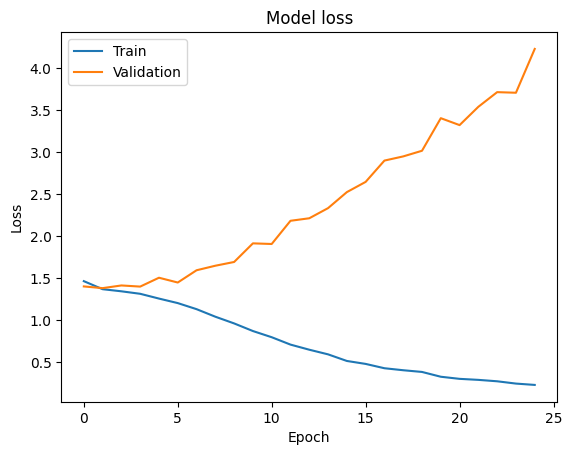

In [105]:
plt.plot(training_log['loss'])
plt.plot(training_log['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
"""
The NN model using bag-of-words outperformed the embedding-based NN and KNN models,
likely due to the interpretability and structure of bag-of-words features.
Embedding-based models may require more sophisticated network architectures or
fine-tuning to achieve competitive performance in this domain.

The KNN model outperformed the NN with embeddings, which might be due to the simplicity
of KNN with LLM embeddings, as it uses direct distance measures on the embeddings,
which can sometimes perform well in lower-complexity classification tasks.

NN with LLM Embeddings:
The accuracy plot shows a significant gap between training and validation accuracy,
with training accuracy increasing steadily while validation accuracy remains low (~0.27).
The loss plot for the model with embeddings shows a divergence: training loss decreases
while validation loss increases, indicating overfitting.
"""

### 10.5 Few-Shot Prompting Classification:
Few-shot prompting classification for LLMs involves giving the model a few labeled examples (typically 5 or fewer) within a prompt to guide it in performing a classification task. Instead of needing extensive training, the LLM uses these examples to understand the task and classify new inputs. This approach is significant in current research because it allows LLMs to perform well on tasks with minimal labeled data, reducing the need for large training datasets and making it highly flexible for various NLP tasks, including those in low-resource languages or niche domains.

In this lab exercise, we will explore zero-shot, 1-shot, and 5-shot prompting for classification using an LLM:

- Zero-shot means the model performs classification without seeing any examples beforehand.
- 1-shot provides the model with just one labeled example per class to guide its classification.
- 5-shot gives the model five labeled examples per class to improve its understanding of the task.

Since processing large datasets can be computationally demanding, we will only sample 20 test texts per emotion for the classification task, allowing us to test the model's performance more efficiently without using the entire test set.

**Process order: Explanation Prompt -> Examples + labels (if it is not zero-shot) -> Text to classify**

**Recommendation for the explanation prompt:** Explain to the model that it is a classification model of certain labels, and to only output the label word, and no other explanation. In this case if the model does not follow the instructions we are retrying the same text until it outputs one of the accepted labels for it.

In [106]:
import ollama
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

# Define the emotion labels
emotions = ['anger', 'fear', 'joy', 'sadness']
# Define the model to use for few-shot prompting
model_ollama = "llama3.2"

# Function to sample examples per emotion category
def sample_few_shots(df, emotions, num_samples=5):
    few_shot_examples = {}
    for emotion in emotions:
        few_shot_examples[emotion] = df[df['emotion'] == emotion].sample(n=num_samples, random_state=42)
    return few_shot_examples

# Function to build the prompt based on the number of examples (few-shot, 1-shot, zero-shot)
def build_prompt(examples, emotions, num_shots=5):
    classification_instructions = """
You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    """

    prompt = classification_instructions + "\n\n"

    if num_shots > 0:
        prompt += f"Examples: \n"
        for emotion in emotions:
            for _, row in examples[emotion].iterrows():
                prompt += f"Text: {row['text']}\nEmotion: {emotion}\n\n" #Show the examples in the same format it will be shown for the classification text
                if num_shots == 1:  # If 1-shot, break after the first example for each emotion
                    break
    return prompt

# Function to classify using the LLM with retry for incorrect responses
def classify_with_llm(test_text, prompt_base):
    valid_emotions = ['anger', 'fear', 'joy', 'sadness']
    response = None
    while not response or response not in valid_emotions:
        full_prompt = f"{prompt_base}\nClassification:\nText: {test_text}\nEmotion: " #The classification text will leave the emotion label to be filled in by the LLM
        result = ollama.chat(model=model_ollama, messages=[
            {'role': 'user', 'content': full_prompt}
        ])
        response = result['message']['content'].strip().lower()  # Clean and standardize the response
        if response not in valid_emotions:  # Retry if not a valid response
            print(f"Invalid response: {response}. Asking for reclassification.")
    return response

# Main function to run the experiment with the option for zero-shot, 1-shot, or 5-shot prompting
def run_experiment(df_train, df_test, test_samples=5, num_shots=5):
    # Sample examples for few-shot prompting based on num_shots
    if num_shots > 0:
        few_shot_examples = sample_few_shots(df_train, emotions, num_samples=num_shots)
        prompt_base = build_prompt(few_shot_examples, emotions, num_shots=num_shots)
    else:
        prompt_base = build_prompt(None, emotions, num_shots=0)  # Zero-shot has no examples

    # Prepare to classify the test set
    predictions = []
    true_labels = []
    print(prompt_base)
    # Sample 20 examples per emotion for the test set to classify
    test_samples = sample_few_shots(df_test, emotions, num_samples=test_samples)

    # Classify 20 test examples (5 from each category) and save predictions
    for emotion in emotions:
        for _, test_row in test_samples[emotion].iterrows():
            test_text = test_row['text']
            predicted_emotion = classify_with_llm(test_text, prompt_base)
            predictions.append(predicted_emotion)
            true_labels.append(emotion)

    # Calculate accuracy
    accuracy = accuracy_score(true_labels, predictions)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Classification report
    print(classification_report(y_true=true_labels, y_pred=predictions))

    # Plot confusion matrix
    cm = confusion_matrix(y_true=true_labels, y_pred=predictions)
    my_tags = ['anger', 'fear', 'joy', 'sadness']
    plot_confusion_matrix(cm, classes=my_tags, title=f'Confusion matrix for classification with \n{num_shots}-shot prompting')


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    


Accuracy: 55.00%
              precision    recall  f1-score   support

       anger       0.45      0.65      0.53        20
        fear       0.67      0.20      0.31        20
         joy       0.53      0.85      0.65        20
     sadness       0.77      0.50      0.61        20

    accuracy                           0.55        80
   macro avg       0.60      0.55      0.52        80
weighted avg       0.60      0.55      0.52        80



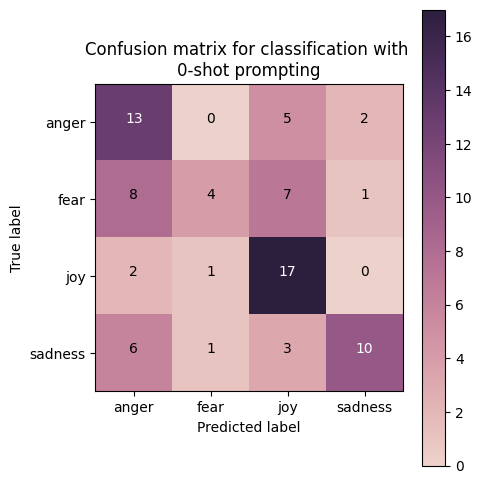

In [107]:
# Example of running the experiment with zero-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=0)


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    

Examples: 
Text: Time wounds all heels.\n\n #DrunkJesus #rt #lol #wisdom #quote #comedy #self #Revenge  #hate #time #funny #politics #Trump #POTUS2016
Emotion: anger

Text: Just had a massive argument with my alarm today... I didn't want to get up. I don't know how we're going to fix this by tomorrow morning 😕
Emotion: fear

Text: Look forward to the detours because they bring delightful surprises. #lifequote 
Emotion: joy

Text: Feels grim not having your nails done
Emotion: sadness


Accuracy: 46.25%
              precision    recall  f1-score   support

       anger       0.34      0.85      0.49        20
        fear       1.00      0

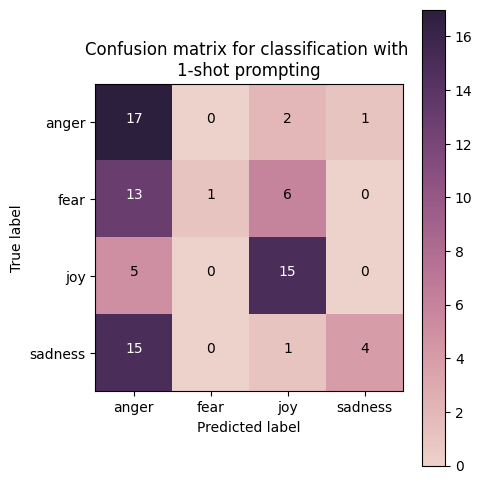

In [108]:
# Example of running the experiment with 1-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=1)


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    

Examples: 
Text: Time wounds all heels.\n\n #DrunkJesus #rt #lol #wisdom #quote #comedy #self #Revenge  #hate #time #funny #politics #Trump #POTUS2016
Emotion: anger

Text: @swagalini ive been through the denial and anger i am in pure acceptance
Emotion: anger

Text: @TillTheEndMMVI I accidetly dumped boiling water my myself 😫
Emotion: anger

Text: Some Mexican ladies irritate the fuck outta me. Have a their own lil preschool of fucking kids for the welfare &amp; allllat smh.
Emotion: anger

Text: @Darren_Hammer amen, nothing personal mate, just tired of all of the complaining from our fans, it's Been a relentless tirade of misery
Emotion:

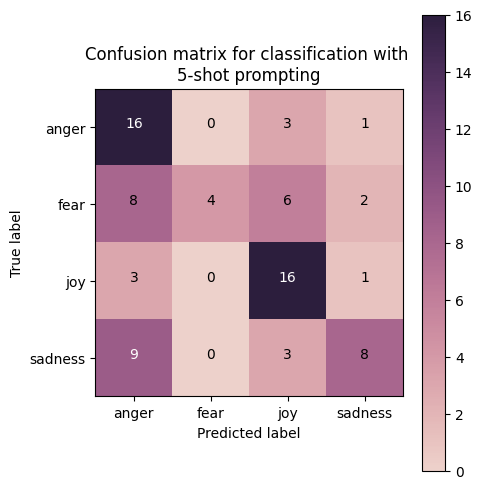

In [109]:
# Example of running the experiment with 5-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=5)

### ** >>> Exercise 13 (Take home): **

Compare and discuss the results of the zero-shot, 1-shot and 5-shot classification.

In [ ]:
# Answer here
"""
Accuracy Consistency: Zero-shot and five-shot achieved similar accuracy (55%),
while one-shot was lower at 46.25%. The consistency in zero-shot and five-shot
performance suggests that adding more examples does not necessarily improve
accuracy across all categories, as the model may require even more examples to
learn fine distinctions.

Model Tendencies: Across all three settings, the model tends to perform well with
"joy" and struggles with "fear." This could be due to the inherent complexity or
ambiguity in distinguishing "fear" expressions from other emotions without
substantial context.

Benefits of Few-Shot Learning: Few-shot learning provides more context, helping
the model recognize nuances in certain emotions. However, five examples might
still be insufficient for emotions with varied expressions (like "fear").
"""

### 10.6 Extra LLM Materials:
So this will be it for the lab, but here are some extra materials if you would like to explore:
- How to use Gemini's LLM API from Google: [Gemini Collab](https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/gemini-api/docs/get-started/python.ipynb?fbclid=IwZXh0bgNhZW0CMTEAAR0-gg7cDIuaGfkeN5U3rusSNKj2jj7bIsL45sZWaM0NbTE7BSNtfzBeEGE_aem_yT5wAuL_G5E21iuuCYJXwA#scrollTo=hskqSKnJUHvp) (Free with some restrictions to the requests per minute.

- How to use OpenAI ChatGPT model's API (Not Free API): [Basics Video](https://www.youtube.com/watch?v=e9P7FLi5Zy8), [Basics GitHub](https://github.com/gkamradt/langchain-tutorials/blob/main/chatapi/ChatAPI%20%2B%20LangChain%20Basics.ipynb), [RAG's Basics Video](https://www.youtube.com/watch?v=9AXP7tCI9PI&t=300s), [RAG's Basics GitHub](https://github.com/techleadhd/chatgpt-retrieval)

- **Advanced topic - QLoRA (Quantized Low-Rank Adapter):** QLoRA is a method used to make fine-tuning large language models more efficient. It works by adding a small, trainable part (LoRA) to a pre-trained model, while keeping the rest of the model frozen. At the same time, it reduces the size of the model’s data using a process called quantization, which makes the model require less memory. This allows you to fine-tune large models without needing as much computational power, making it easier to adapt models for specific tasks. Materials: [Paper GitHub](https://github.com/artidoro/qlora?tab=readme-ov-file), [Llama 3 Application Video](https://www.youtube.com/watch?v=YJNbgusTSF0&t=512s),[Llama 3 Application GitHub](https://github.com/adidror005/youtube-videos/blob/main/LLAMA_3_Fine_Tuning_for_Sequence_Classification_Actual_Video.ipynb)

---